In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
IMOEX = pd.read_csv('IMOEX_D.csv', index_col='date')
BRENT = pd.read_csv('BRENT.csv', index_col='date')
SNP500 = pd.read_csv('SNP500.csv', index_col='date')
GOLD = pd.read_csv('GOLD.csv', index_col='date')
USDRUB = pd.read_csv('USDRUB.csv', index_col='date')
EURRUB = pd.read_csv('EURRUB.csv', index_col='date')

In [6]:
IMOEX.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,year,month,day
date,,,,,,,,
2015-01-05,1393.37,1438.86,1390.62,1435.66,15320687285,2015,1,5
2015-01-06,1431.60,1481.30,1430.69,1480.73,21268814897,2015,1,6
2015-01-08,1482.12,1564.76,1482.12,1547.39,35505063516,2015,1,8
2015-01-09,1548.77,1557.83,1496.18,1515.37,27223058410,2015,1,9
2015-01-12,1512.65,1534.49,1503.60,1513.22,23419055856,2015,1,12


In [ ]:
IMOEX.drop('year',axis=1, inplace=True)
IMOEX['delta_lh'] = IMOEX['<HIGH>'] - IMOEX['<LOW>']
IMOEX['delta_oc'] = abs(IMOEX['<OPEN>'] - IMOEX['<CLOSE>'])
IMOEX['EMA10'] = IMOEX['<CLOSE>'].rolling(10, center=True).mean()
IMOEX['EMA30'] = IMOEX['<CLOSE>'].rolling(30, center=True).mean()
IMOEX['EMA90'] = IMOEX['<CLOSE>'].rolling(90, center=True).mean()
IMOEX['EMA150'] = IMOEX['<CLOSE>'].rolling(150, center=True).mean()

In [64]:
IMOEX['target_per'] = (IMOEX['<CLOSE>'].shift(-10) - IMOEX['<CLOSE>']) / IMOEX['<CLOSE>'] * 100


In [75]:
target_m = list()
for per in IMOEX['target_per']:
    if per<=-10.:
        target_m.append(0)
    elif per<= -5.:
        target_m.append(1)
    elif per<= 0.:
        target_m.append(2)
    elif per<= 5.:
        target_m.append(3)
    elif per<= 10.:
        target_m.append(4)
    else:
        target_m.append(5)
target_m[:10]        

[4, 4, 4, 5, 4, 4, 4, 3, 3, 3]

In [76]:
IMOEX['target_class'] = pd.Series(target_m, index=IMOEX.index)

In [78]:
IMOEX.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class
date,,,,,,,,,,,,,,,
2015-01-05,1393.37,1438.86,1390.62,1435.66,15320687285,1,5,48.24,42.29,NaN,NaN,NaN,NaN,9.424933,4
2015-01-06,1431.60,1481.30,1430.69,1480.73,21268814897,1,6,50.61,49.13,NaN,NaN,NaN,NaN,9.281908,4
2015-01-08,1482.12,1564.76,1482.12,1547.39,35505063516,1,8,82.64,65.27,NaN,NaN,NaN,NaN,7.701355,4
2015-01-09,1548.77,1557.83,1496.18,1515.37,27223058410,1,9,61.65,33.40,NaN,NaN,NaN,NaN,10.322891,5
2015-01-12,1512.65,1534.49,1503.60,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4


In [95]:
data = IMOEX.drop(['<OPEN>','<HIGH>','<LOW>'], axis=1)
data.head()

,<CLOSE>,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class
date,,,,,,,,,,,,
2015-01-05,1435.66,15320687285,1,5,48.24,42.29,NaN,NaN,NaN,NaN,9.424933,4
2015-01-06,1480.73,21268814897,1,6,50.61,49.13,NaN,NaN,NaN,NaN,9.281908,4
2015-01-08,1547.39,35505063516,1,8,82.64,65.27,NaN,NaN,NaN,NaN,7.701355,4
2015-01-09,1515.37,27223058410,1,9,61.65,33.40,NaN,NaN,NaN,NaN,10.322891,5
2015-01-12,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4


In [99]:
data_2 = pd.merge(data, BRENT['<CLOSE>'], left_index=True, right_index=True,suffixes=["_IM", "_BRENT"])

In [104]:
data_3 = pd.merge(data_2, SNP500['<CLOSE>'], left_index=True, right_index=True)
data_3.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>
date,,,,,,,,,,,,,,
2015-01-05,1435.66,15320687285,1,5,48.24,42.29,NaN,NaN,NaN,NaN,9.424933,4,53.15,2020.58
2015-01-06,1480.73,21268814897,1,6,50.61,49.13,NaN,NaN,NaN,NaN,9.281908,4,50.90,2002.61
2015-01-08,1547.39,35505063516,1,8,82.64,65.27,NaN,NaN,NaN,NaN,7.701355,4,51.05,2062.14
2015-01-09,1515.37,27223058410,1,9,61.65,33.40,NaN,NaN,NaN,NaN,10.322891,5,49.95,2044.81
2015-01-12,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4,47.20,2028.26


In [105]:
data_4 = pd.merge(data_3, GOLD['<CLOSE>'], left_index=True, right_index=True, suffixes=["_SNP500", "_GOLD"])
data_4.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD
date,,,,,,,,,,,,,,,
2015-01-05,1435.66,15320687285,1,5,48.24,42.29,NaN,NaN,NaN,NaN,9.424933,4,53.15,2020.58,1206.0
2015-01-06,1480.73,21268814897,1,6,50.61,49.13,NaN,NaN,NaN,NaN,9.281908,4,50.90,2002.61,1213.7
2015-01-08,1547.39,35505063516,1,8,82.64,65.27,NaN,NaN,NaN,NaN,7.701355,4,51.05,2062.14,1212.2
2015-01-09,1515.37,27223058410,1,9,61.65,33.40,NaN,NaN,NaN,NaN,10.322891,5,49.95,2044.81,1223.4
2015-01-12,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4,47.20,2028.26,1235.9


In [106]:
data_5 = pd.merge(data_4, USDRUB['<CLOSE>'], left_index=True, right_index=True)
data_5.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD,<CLOSE>
date,,,,,,,,,,,,,,,,
2015-01-12,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4,47.20,2028.26,1235.9,62.9650
2015-01-13,1533.09,33133664935,1,13,44.01,19.57,1531.096,NaN,NaN,NaN,9.186023,4,46.79,2023.03,1227.8,66.2790
2015-01-14,1554.46,32105492806,1,14,35.17,22.74,1544.627,NaN,NaN,NaN,5.998868,4,48.61,2011.27,1229.5,66.4995
2015-01-15,1563.21,38679500660,1,15,30.75,0.53,1558.371,NaN,NaN,NaN,4.889938,3,48.36,1992.67,1257.6,64.4500
2015-01-16,1591.43,30068854489,1,16,43.03,32.19,1570.288,NaN,NaN,NaN,3.535185,3,49.90,2019.42,1280.3,65.2025


In [107]:
data_6 = pd.merge(data_5, EURRUB['<CLOSE>'], left_index=True, right_index=True, suffixes=["_USDRUB", "_EURRUB"])
data_6.head()

,<CLOSE>_IM,<VOL>,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,<CLOSE>_BRENT,<CLOSE>_SNP500,<CLOSE>_GOLD,<CLOSE>_USDRUB,<CLOSE>_EURRUB
date,,,,,,,,,,,,,,,,,
2015-01-12,1513.22,23419055856,1,12,30.89,0.57,NaN,NaN,NaN,NaN,8.534780,4,47.20,2028.26,1235.9,62.9650,73.3500
2015-01-13,1533.09,33133664935,1,13,44.01,19.57,1531.096,NaN,NaN,NaN,9.186023,4,46.79,2023.03,1227.8,66.2790,77.0995
2015-01-14,1554.46,32105492806,1,14,35.17,22.74,1544.627,NaN,NaN,NaN,5.998868,4,48.61,2011.27,1229.5,66.4995,77.7175
2015-01-15,1563.21,38679500660,1,15,30.75,0.53,1558.371,NaN,NaN,NaN,4.889938,3,48.36,1992.67,1257.6,64.4500,76.3985
2015-01-16,1591.43,30068854489,1,16,43.03,32.19,1570.288,NaN,NaN,NaN,3.535185,3,49.90,2019.42,1280.3,65.2025,75.4000


In [108]:
data_6.columns

Index([u'<CLOSE>_IM', u'<VOL>', u'month', u'day', u'delta_lh', u'delta_oc',
       u'EMA10', u'EMA30', u'EMA90', u'EMA150', u'target_per', u'target_class',
       u'<CLOSE>_BRENT', u'<CLOSE>_SNP500', u'<CLOSE>_GOLD', u'<CLOSE>_USDRUB',
       u'<CLOSE>_EURRUB'],
      dtype='object')

In [109]:
data = data_6
data.columns = [u'IMOEX', u'VOL', u'month', u'day', u'delta_lh', u'delta_oc',
       u'EMA10', u'EMA30', u'EMA90', u'EMA150', u'target_per', u'target_class',
       u'BRENT', u'SNP500', u'GOLD', u'USDRUB',
       u'EURRUB']

In [111]:
data.to_csv('data_imoex')

In [112]:
data.corr()

,IMOEX,VOL,month,day,delta_lh,delta_oc,EMA10,EMA30,EMA90,EMA150,target_per,target_class,BRENT,SNP500,GOLD,USDRUB,EURRUB
IMOEX,1.000000,0.487298,0.043032,-0.002769,0.081427,0.053134,0.998806,0.996283,0.990698,0.984227,-0.081137,-0.028480,0.515649,0.931213,0.788074,0.114155,0.153540
VOL,0.487298,1.000000,-0.138263,-0.010821,0.635644,0.426432,0.484963,0.477623,0.426381,0.396805,0.019433,0.121101,0.187325,0.441995,0.441852,0.120632,0.125639
month,0.043032,-0.138263,1.000000,-0.046304,-0.184237,-0.090284,0.047262,0.058886,0.124578,0.019974,0.083529,0.016159,0.014902,0.049872,-0.085409,0.061492,0.039512
day,-0.002769,-0.010821,-0.046304,1.000000,-0.022434,0.012285,0.007863,0.009844,-0.001159,-0.000893,0.122118,0.090913,0.012437,0.006568,-0.003319,-0.028826,-0.028830
delta_lh,0.081427,0.635644,-0.184237,-0.022434,1.000000,0.787752,0.070046,0.053995,0.060168,0.088841,0.040398,0.122078,0.041830,0.066420,0.089084,0.120166,0.094828
delta_oc,0.053134,0.426432,-0.090284,0.012285,0.787752,1.000000,0.046731,0.034441,0.033810,0.064731,-0.004733,0.049370,0.040003,0.041016,0.036613,0.049537,0.027068
EMA10,0.998806,0.484963,0.047262,0.007863,0.070046,0.046731,1.000000,0.998237,0.992993,0.986854,-0.060717,-0.031881,0.520203,0.931132,0.789322,0.112099,0.152744
EMA30,0.996283,0.477623,0.058886,0.009844,0.053995,0.034441,0.998237,1.000000,0.996587,0.991372,0.016159,-0.003456,0.528000,0.929351,0.789203,0.119096,0.172696
EMA90,0.990698,0.426381,0.124578,-0.001159,0.060168,0.033810,0.992993,0.996587,1.000000,0.998104,0.059853,0.037191,0.564631,0.919664,0.766302,0.153410,0.227097
EMA150,0.984227,0.396805,0.019974,-0.000893,0.088841,0.064731,0.986854,0.991372,0.998104,1.000000,0.052456,0.039397,0.583908,0.911975,0.742842,0.123780,0.206586


In [114]:
X = data.dropna().drop(['target_per','target_class'], axis=1)
y = data.dropna()['target_class']

In [149]:
y.unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [152]:
print y[y==1].count()
print y[y==2].count()
print y[y==3].count()
print y[y==4].count()
print y[y==5].count()

19
445
557
54
1


In [116]:
print X.shape
print y.shape

(1076, 15)
(1076L,)


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle = True, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [134]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.88      0.79      0.84       126
           3       0.85      0.84      0.84       138
           4       0.23      0.75      0.35         4

   micro avg       0.81      0.81      0.81       269
   macro avg       0.49      0.60      0.51       269
weighted avg       0.85      0.81      0.83       269



Text(89.18,0.5,'predicted label')

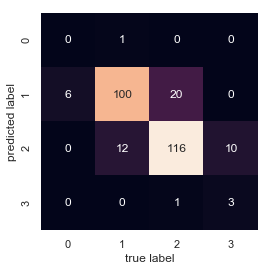

In [155]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [163]:
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
model_2 = RandomForestClassifier(n_estimators=1000)
X_sh, y_sh = shuffle(X, y, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(model_2, X_sh, y_sh, train_sizes=np.arange(0.1,1,0.2),cv=3,scoring='accuracy')

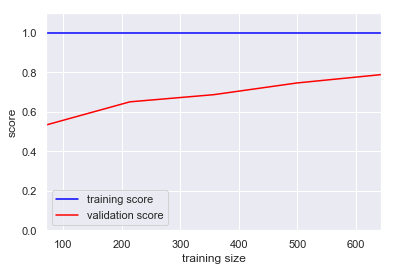

In [164]:
plt.plot(train_sizes, np.mean(train_scores, 1), color='blue', label='training score')
plt.plot(train_sizes, np.mean(test_scores, 1), color='red', label='validation score')
plt.ylim(0, 1.1)
plt.xlim(train_sizes[0], train_sizes[-1])
plt.xlabel('training size') # Размерность обучения
plt.ylabel('score')
plt.legend(loc='best')

In [165]:
metrics.accuracy_score(ypred, ytest)

0.8141263940520446